# 1. Import necessary functions or libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

C:\Users\kruta\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
data = pd.read_csv("diabetes.csv")
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

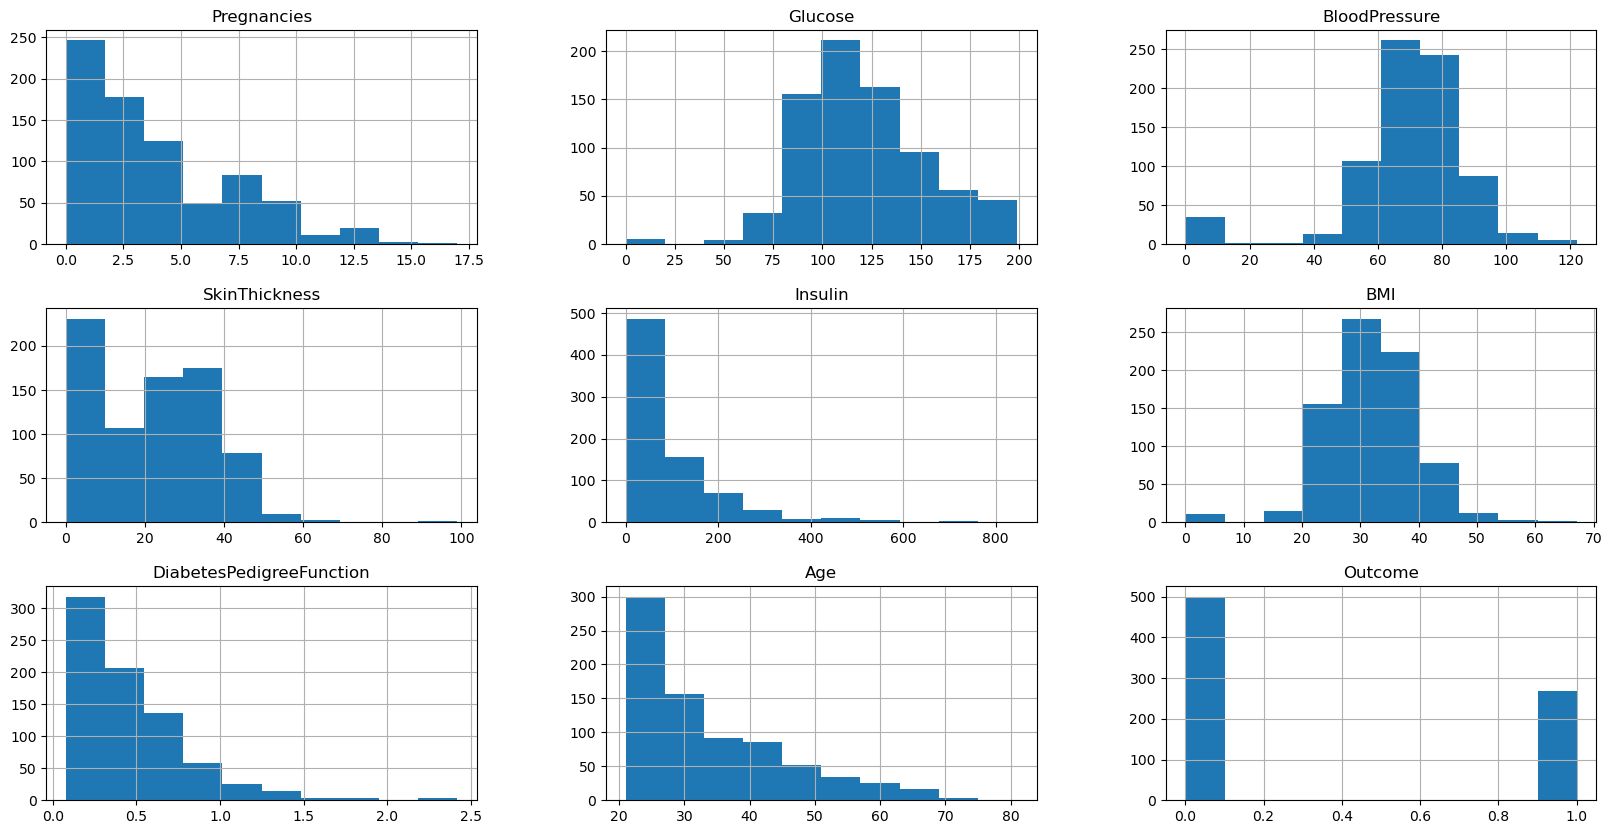

In [6]:
data.hist(figsize=(20, 10))          #Generates individual histograms for each column in the DataFrame data.
plt.show()

<AxesSubplot:>

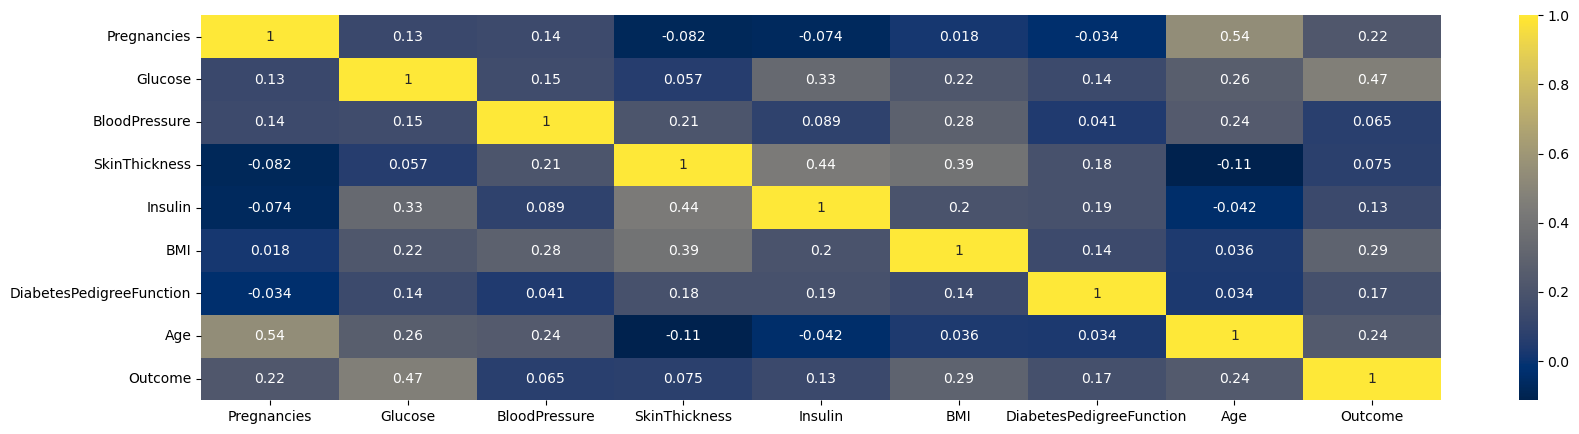

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True, cmap="cividis")

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

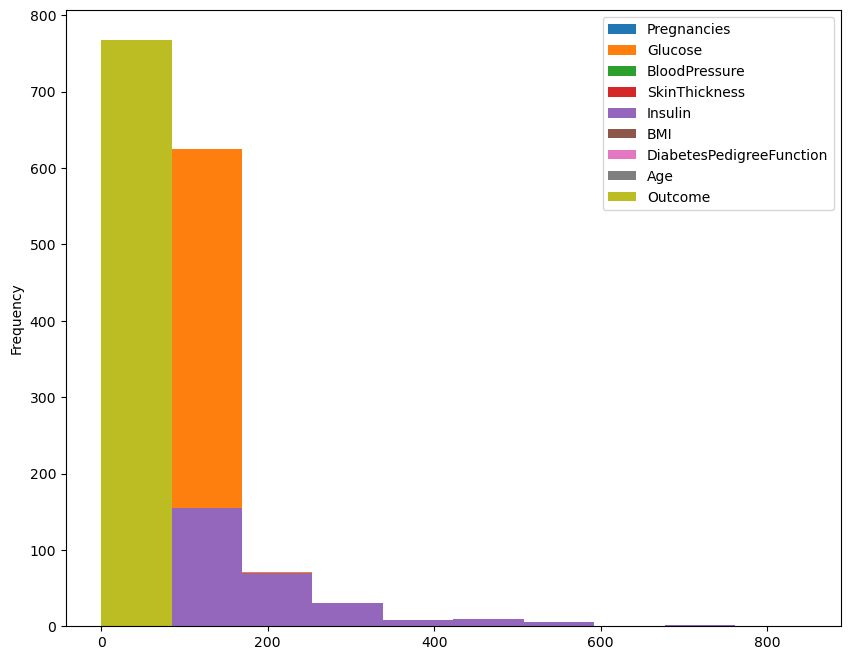

In [10]:
data.plot.hist(figsize=(10,8))      # To generate histograms for each column in the DataFrame data.
plt.show()

In [11]:
X = data.drop('Outcome',axis=1)
y = data.Outcome
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)

In [15]:
X_train.shape

(576, 8)

In [16]:
X_test.shape

(192, 8)

In [17]:
y_train.value_counts()

0    375
1    201
Name: Outcome, dtype: int64

In [18]:
#Train a model using decision tree and then using bagging
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.70779221, 0.66233766, 0.68181818, 0.79084967, 0.7124183 ])

In [19]:
scores.mean()

0.7110432051608522

In [20]:

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.7534722222222222

In [21]:
bag_model.score(X_test, y_test)

0.7760416666666666

In [22]:
#Use bagging now with decision tree
bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state = 0
)

scores = cross_val_score(bag_model, X, y, cv=5)
scores.mean()

0.7578728461081402

In [23]:
#Train a model using Random Forest which itself uses bagging underneath
scores = cross_val_score(RandomForestClassifier(), X, y, cv=5)
scores.mean()


0.7800186741363213